In [6]:
from db_helper import DBHelper
import datetime
import networkx as nx
from node2vec import Node2Vec
from datetime import datetime

In [8]:
MONTH_TAG="month"
YEAR_TAG="year"
DAY_TAG="day"

MONTHS = {1:"JAN",2:"FEB",3:"MAR",4:"APR",
          5:"MAY",6:"JUN",7:"JUL",8:"AUG",
         9:"SEP",10:"OCT",11:"NOV",12:"DEC"}

In [11]:
db = DBHelper()
db.connect(user="root",passwd="Hasan5695*",db="cse496")

In [12]:
tweets = db.getTweets("denemeShort")
tweets.sort(key=lambda t: t.date)

In [6]:
#Print first tweet
print("ExampleSentName:",tweets[0].sentName)
print("ExampleText:",tweets[0].text)
print("ExampleDate:",tweets[0].date)

ExampleSentName: osmancoskungazi
ExampleText: Hayat bu, bir bakarsın herşey bir anda son bulur.
 Hayat bu, son dediğin an herşey yeniden can bulur..Şemsi Tebrizi
ExampleDate: 2013-06-25 16:24:47


In [7]:
# Print sorted tweets
"""
for i in range(0,100):
    print("ExampleSentName:",tweets[i].sentName)
    print("ExampleText:",tweets[i].text)
    print("ExampleDate:",tweets[i].date)
    print("ExampleDateStr",tweets[i].dateStr)
"""


'\nfor i in range(0,100):\n    print("ExampleSentName:",tweets[i].sentName)\n    print("ExampleText:",tweets[i].text)\n    print("ExampleDate:",tweets[i].date)\n    print("ExampleDateStr",tweets[i].dateStr)\n'

In [109]:
G3 = nx.Graph()
G3.add_node(YEAR_TAG)
G3.add_node(MONTH_TAG)
G3.add_node(DAY_TAG)
#nx.draw(G,width=0.5,node_size=80,font_size=8,with_labels=True)

In [110]:
# Draw Graph According to Page3
startTime = datetime.now()
#for i in range(0,10000):
#    tweet = tweets[i]
for tweet in tweets:
    # connect Year edges
    G3.add_edge(tweet.date.year,MONTHS[tweet.date.month])
    G3.add_edge(tweet.date.year,YEAR_TAG)
    # connect month edges
    G3.add_edge(MONTHS[tweet.date.month],MONTH_TAG)
    G3.add_edge(MONTHS[tweet.date.month],tweet.date.day)
    # connect day edges
    G3.add_edge(tweet.date.day,DAY_TAG)
endTime = datetime.now()
print("Time3 Graph construct time: ",endTime-startTime)
print("Number of edges: ",G3.number_of_edges())
print("Number of nodes: ",G3.number_of_nodes())

Time3 Graph construct time:  0:00:00.786642
Number of edges:  465
Number of nodes:  51


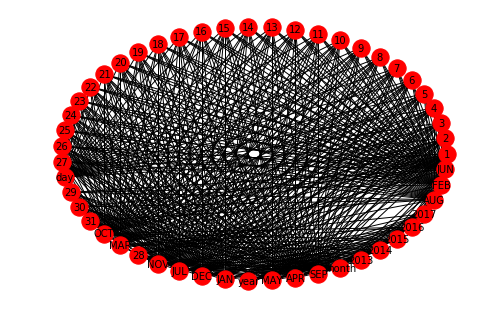

In [111]:
pos=nx.circular_layout(G3)
#nx.draw(G3,width=1,node_size=300,font_size=10,with_labels=True)
nx.draw(G3,pos,node_size=300,font_size=10,with_labels=True)

In [112]:
# train, create new node2ve model
time3N2V = Node2Vec(G3, dimensions=64, walk_length=2, num_walks=100, workers=3) 

Generating walks (CPU: 3): 100%|██████████| 33/33 [00:00<00:00, 283.26it/s]


In [113]:
# run/fit word2vec algorithm and get wv model
model3 = time3N2V.fit(window=10, min_count=1, batch_words=4)

In [114]:
model3.wv.save_word2vec_format("../outputs/time3_wv_format.model")

# Save model for later use
model3.save("../outputs/time3.model")

In [115]:
model3.wv.most_similar("2015")

[('JUN', 0.42801493406295776),
 ('JUL', 0.41438233852386475),
 ('MAR', 0.3860359489917755),
 ('AUG', 0.37652385234832764),
 ('year', 0.34983426332473755),
 ('7', 0.3410890996456146),
 ('DEC', 0.3232412338256836),
 ('APR', 0.32003840804100037),
 ('OCT', 0.28617528080940247),
 ('2014', 0.256333589553833)]

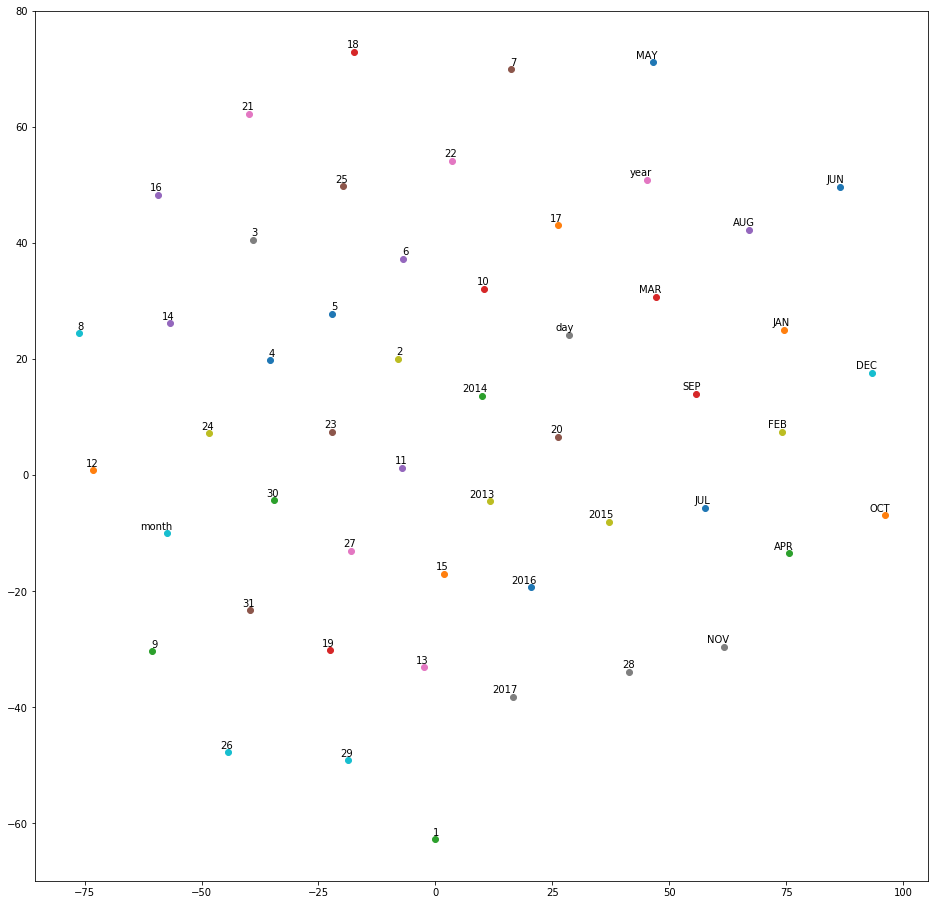

In [116]:
tsne_plot(model3)

In [14]:
# Draw Graph According to Page1
G1 = nx.DiGraph()
G1.add_node(YEAR_TAG)
G1.add_node(MONTH_TAG)

In [15]:
prevYear = None
prevMonth = None

prevYear = tweets[0].date.year
prevMonth = tweets[0].date.month

# Get random sorted tweets and draw graph
startTime = datetime.now()
#for i in range(0,10000,1000):
#    tweet = tweets[i]
for tweet in tweets:
    #print(tweet.date.year," ",tweet.date.month," ",tweet.date.day)
            
    G1.add_edge(YEAR_TAG,tweet.date.year,weight=tweet.date.year)
    
    if(prevYear < tweet.date.year):
        G1.add_edge(prevYear,tweet.date.year)
        prevYear = tweet.date.year
        prevMonth = tweet.date.month
        
    monthFormat = "{month} {year}".format(month=MONTHS[tweet.date.month],year=tweet.date.year)
    if(prevMonth < tweet.date.month):
        prevMonthFormat = "{month} {year}".format(month=MONTHS[prevMonth],year=tweet.date.year)
        G1.add_edge(prevMonthFormat,monthFormat)
        prevMonth = tweet.date.month
    
    G1.add_edge(tweet.date.year,monthFormat)
    
    G1.add_edge(MONTH_TAG,monthFormat,month=tweet.date.month, year=tweet.date.year)
endTime = datetime.now()
print("Time1 Graph construct time: ",endTime-startTime)
print("Number of edges: ",G1.number_of_edges())
print("Number of nodes: ",G1.number_of_nodes())

Time1 Graph construct time:  0:00:00.586203
Number of edges:  157
Number of nodes:  58


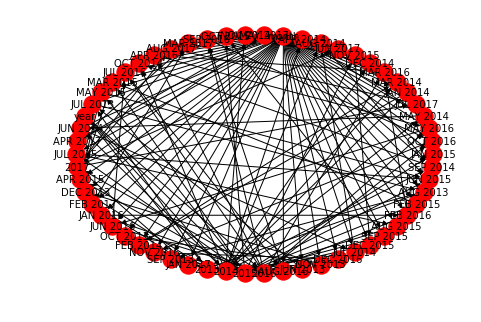

In [16]:
pos=nx.circular_layout(G1)
#nx.draw(G3,width=1,node_size=300,font_size=10,with_labels=True)
nx.draw(G1,pos,node_size=300,font_size=10,with_labels=True)

In [17]:
# train, create new node2ve model
time1N2V = Node2Vec(G1, dimensions=64, walk_length=1, num_walks=100, workers=3) 

Generating walks (CPU: 3): 100%|██████████| 33/33 [00:00<00:00, 4263.82it/s]


In [44]:
# run/fit word2vec algorithm and get wv model
model = time1N2V.fit(window=10, min_count=1, batch_words=4)

In [45]:
model.wv.save_word2vec_format("../outputs/time1_wv_format.model")

# Save model for later use
model.save("../outputs/time1.model")

In [46]:
model.wv.most_similar("2015")

[('FEB 2016', 0.4063064157962799),
 ('SEP 2013', 0.24015925824642181),
 ('JUN 2014', 0.23712849617004395),
 ('MAR 2014', 0.22219261527061462),
 ('JAN 2014', 0.18761280179023743),
 ('JAN 2017', 0.18189367651939392),
 ('NOV 2015', 0.153492271900177),
 ('JUN 2015', 0.1476680338382721),
 ('JUL 2014', 0.1396099030971527),
 ('DEC 2015', 0.1374005526304245)]

In [48]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [38]:
model = gensim.models.KeyedVectors.load_word2vec_format("../outputs/time1_vw_format.model",binary=True)

In [103]:
#print(model.wv.vocab)
print(model.wv.most_similar("2015"))

[('FEB 2016', 0.4063064157962799), ('SEP 2013', 0.24015925824642181), ('JUN 2014', 0.23712849617004395), ('MAR 2014', 0.22219261527061462), ('JAN 2014', 0.18761280179023743), ('JAN 2017', 0.18189367651939392), ('NOV 2015', 0.153492271900177), ('JUN 2015', 0.1476680338382721), ('JUL 2014', 0.1396099030971527), ('DEC 2015', 0.1374005526304245)]


In [106]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

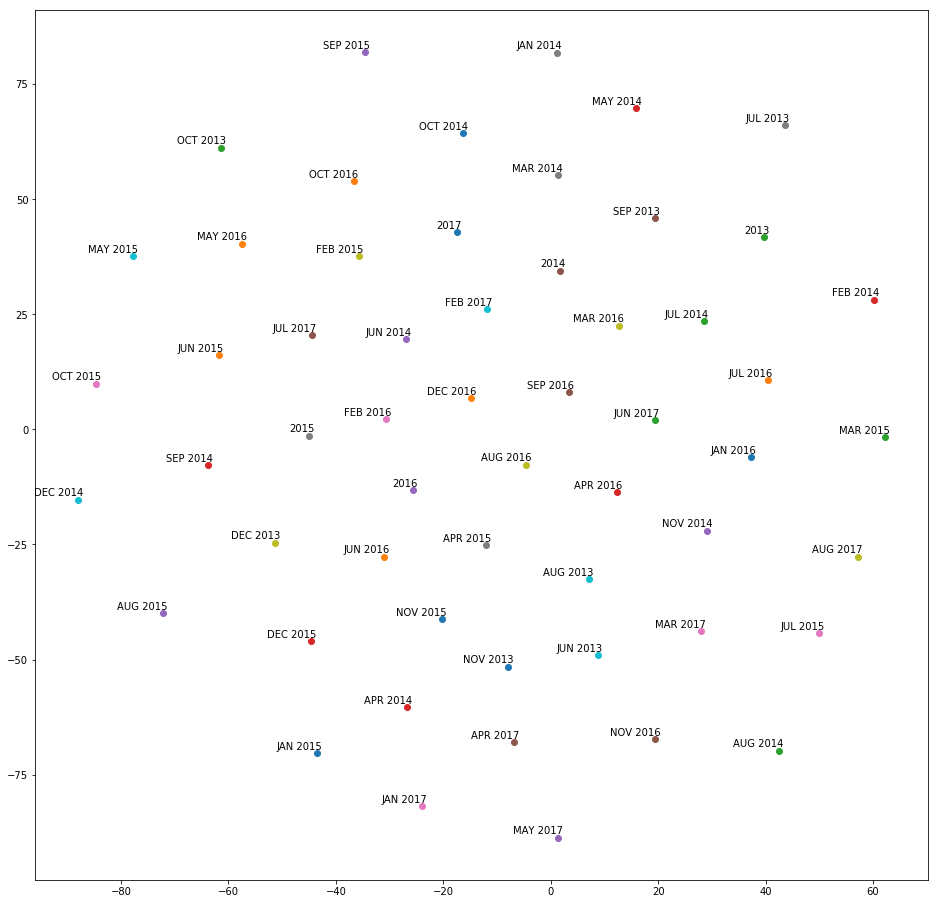

In [107]:
tsne_plot(model)